Support Vector Machines (SVM) and Deep Neural Network (DNN) Using Plurality Prediction

Combined Accuracy: 0.30275229357798167
Combined Precision: 0.5830357142857143
Combined Recall: 0.306557250732008
F1 Score: 0.22538775989437693
AUC: 0.7188905214166252
V Score: 0.2237708477996809


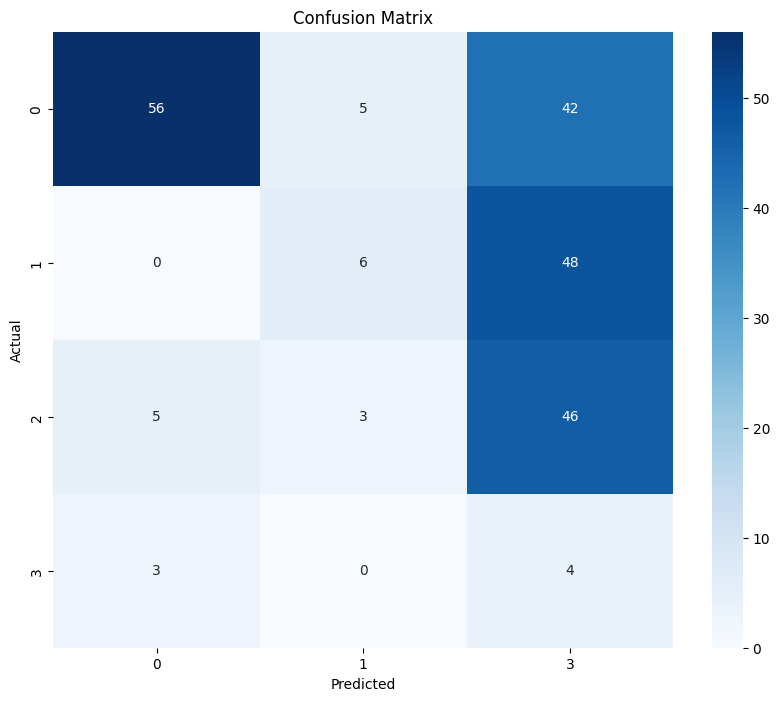

In [11]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\dataset_NoPCA.csv'
df = pd.read_csv(dataset_path)

# Convert the target variable to numeric values
df['classification'] = pd.Categorical(df['classification'])
df['classification'] = df['classification'].cat.codes

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the first classifier (SVM)
clf1 = SVC(kernel='rbf', C=1.0, probability=True)
clf1.fit(X_train, y_train)

# Train the second classifier (DNN)
clf2 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
clf2.fit(X_train, y_train)

# Get predicted probabilities for each class
pred_prob1 = clf1.predict_proba(X_test)
pred_prob2 = clf2.predict_proba(X_test)

# Combine predicted probabilities using plurality voting
combined_prob = (pred_prob1 + pred_prob2) / 2

# Calculate predicted class labels
combined_pred = np.argmax(combined_prob, axis=1)

# Calculate accuracy, precision, recall, F1 score, AUC, and V score of the combined predictions
accuracy = accuracy_score(y_test, combined_pred)
precision = precision_score(y_test, combined_pred, average='macro', zero_division=1)
recall = recall_score(y_test, combined_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, combined_pred, average='macro', zero_division=1)
auc = roc_auc_score(pd.get_dummies(y_test).values, combined_prob, multi_class='ovr')
v_score = matthews_corrcoef(y_test, combined_pred)

print("Combined Accuracy:", accuracy)
print("Combined Precision:", precision)
print("Combined Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)

# Calculate and visualize the confusion matrix
confusion_matrix = pd.crosstab(y_test, combined_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()
